In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Sleep_Efficiency.csv')

# Doing the same data pre-processing
df["Caffeine consumption"] = df["Caffeine consumption"].fillna(0)
df["Awakenings"] = df["Awakenings"].fillna(0)
df["Alcohol consumption"] = df["Alcohol consumption"].fillna(0)
df["Exercise frequency"] = df["Exercise frequency"].transform(
    lambda x: x.fillna(x.median()))

df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
sleepEff = df['Sleep efficiency'].values
mean = np.mean(sleepEff)
std_dev = np.std(sleepEff)
normalized_data = (sleepEff - mean) / std_dev

df['Normalized sleepEff'] = normalized_data

above_0 = df[df['Normalized sleepEff'] > 0]
below_0 = df[df['Normalized sleepEff'] <= 0]

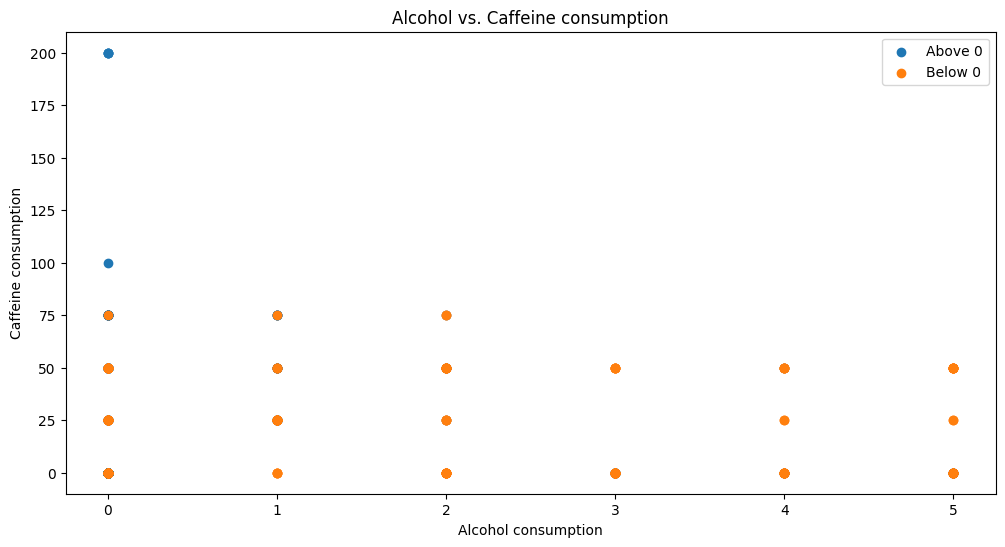

In [ ]:
plt.figure(figsize = (12, 6))

# Scatter plot for above 0 class
plt.scatter(above_0['Alcohol consumption'], above_0['Caffeine consumption'], label='Above 0')

# Scatter plot for below 0 class
plt.scatter(below_0['Alcohol consumption'], below_0['Caffeine consumption'], label='Below 0')

# Adding labels and title
plt.xlabel('Alcohol consumption')
plt.ylabel('Caffeine consumption')
plt.title('Alcohol vs. Caffeine consumption')
plt.legend()

# Show the plot
plt.show()

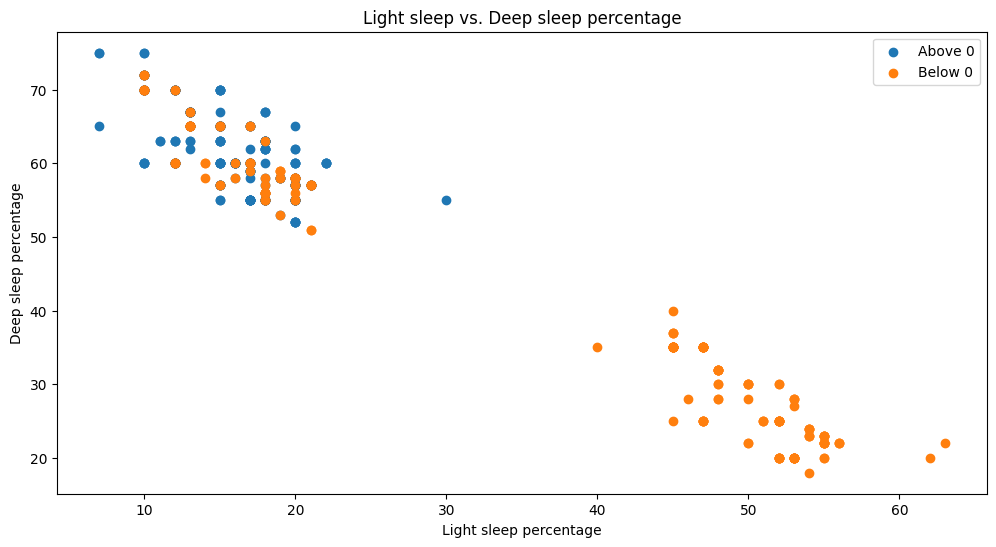

In [ ]:
plt.figure(figsize = (12, 6))

# Scatter plot for above 0 class
plt.scatter(above_0['Light sleep percentage'], above_0['Deep sleep percentage'], label='Above 0')

# Scatter plot for below 0 class
plt.scatter(below_0['Light sleep percentage'], below_0['Deep sleep percentage'], label='Below 0')

# Adding labels and title
plt.xlabel('Light sleep percentage')
plt.ylabel('Deep sleep percentage')
plt.title('Light sleep vs. Deep sleep percentage')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df1 = pd.read_csv('Sleep_Efficiency.csv')

# Doing the same data pre-processing
df1["Caffeine consumption"] = df1["Caffeine consumption"].fillna(0)
df1["Awakenings"] = df1["Awakenings"].fillna(0)
df1["Alcohol consumption"] = df1["Alcohol consumption"].fillna(0)
df1["Exercise frequency"] = df1["Exercise frequency"].transform(
    lambda x: x.fillna(x.median()))

# Create categorical labels for the Sleep Efficiency column
bins = [0, 0.66, 0.82, 1]
labels = ['Low', 'Medium', 'High']
df1['Sleep Efficiency Category'] = pd.cut(df1['Sleep efficiency'], bins=bins, labels=labels, include_lowest=True)

# Drop unnecessary columns
df1 = df1.drop(columns=['ID', 'Sleep efficiency', 'Gender', 'Bedtime', 'Wakeup time', 'Smoking status', 'Sleep duration'])

# Separate features and labels
X = df1.drop(columns=['Sleep Efficiency Category'])
y = df1['Sleep Efficiency Category']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=20)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.89      0.84        46
         Low       0.81      1.00      0.89        17
      Medium       0.72      0.46      0.57        28

    accuracy                           0.78        91
   macro avg       0.77      0.79      0.77        91
weighted avg       0.77      0.78      0.76        91



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

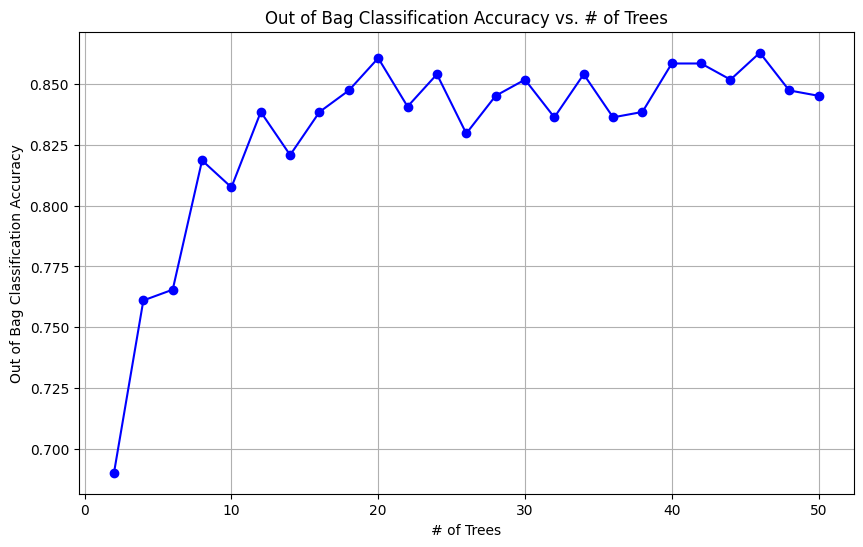

In [ ]:
trees_range = np.arange(2, 52, 2)
oob_acc_list = []

for tree in trees_range:
  RF_classifier = RandomForestClassifier(n_estimators = tree, oob_score = True)
  RF_classifier.fit(X, y)
  oob_accuracy = RF_classifier.oob_score_
  oob_acc_list.append(oob_accuracy)

plt.figure(figsize = (10, 6))
plt.plot(trees_range, oob_acc_list, marker = 'o', linestyle = '-', color = 'b')
plt.title('Out of Bag Classification Accuracy vs. # of Trees')
plt.xlabel('# of Trees')
plt.ylabel('Out of Bag Classification Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the Random Forest classifier
RF_classifier = RandomForestClassifier(n_estimators = 38, oob_score = True)
RF_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

        High       0.94      0.96      0.95        49
         Low       0.89      0.94      0.92        18
      Medium       0.86      0.79      0.83        24

    accuracy                           0.91        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.91      0.91      0.91        91



In [ ]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_importance = RF_classifier.feature_importances_
oob_score_46 = RF_classifier.oob_score_
df_feature = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by = 'Importance', ascending = False)
print(df_feature)

                  Feature  Importance
4              Awakenings    0.278680
2   Deep sleep percentage    0.206328
3  Light sleep percentage    0.195237
0                     Age    0.125266
6     Alcohol consumption    0.061697
1    REM sleep percentage    0.060306
7      Exercise frequency    0.045202
5    Caffeine consumption    0.027284


In [ ]:
df2 = pd.read_csv('Sleep_Efficiency.csv')
df2.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [ ]:
# Engineering a deviation score for each person based on the generally accepted "good night's sleep" ratio of 25-25-50 for REM, deep and light sleep
df2['devScore'] = np.sqrt(((df2['REM sleep percentage'] - 25)**2) + ((df2['Deep sleep percentage'] - 25)**2) + ((df2['Light sleep percentage'] - 50)**2))
df2['normDevScore'] = (df2['devScore'] - df2['devScore'].mean()) / df2['devScore'].std()

df2.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,devScore,normDevScore
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000,452.000000,4.520000e+02
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480,39.443163,-1.178998e-16
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134,19.048606,1.000000e+00
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.414214,-1.996416e+00
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,32.739502,-3.519240e-01
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000,46.043412,3.464951e-01
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000,52.506214,6.857746e-01
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000,66.317419,1.410825e+00


In [ ]:
df2["Caffeine consumption"] = df2["Caffeine consumption"].fillna(0)
df2["Awakenings"] = df2["Awakenings"].fillna(0)
df2["Alcohol consumption"] = df2["Alcohol consumption"].fillna(0)
df2["Exercise frequency"] = df2["Exercise frequency"].transform(
    lambda x: x.fillna(x.median()))

# Separate the dataset into two categories based on the normalized sleep deviation score
bins = [-5, 0, 5]
labels = ['Below 0', 'Above 0']
df2['devCategory'] = pd.cut(df2['normDevScore'], bins=bins, labels=labels, include_lowest=True)

# Drop unnecessary columns
df2 = df2.drop(columns=['ID', 'Sleep efficiency', 'Gender', 'Bedtime', 'Wakeup time',
                        'Smoking status', 'Sleep duration', 'REM sleep percentage',
                        'Deep sleep percentage', 'Light sleep percentage', 'devScore',
                        'normDevScore', 'Age', 'Awakenings'])

# Separate features and labels
X = df2.drop(columns=['devCategory'])
y = df2['devCategory']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=20)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

     Above 0       0.90      0.88      0.89        75
     Below 0       0.50      0.56      0.53        16

    accuracy                           0.82        91
   macro avg       0.70      0.72      0.71        91
weighted avg       0.83      0.82      0.83        91



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

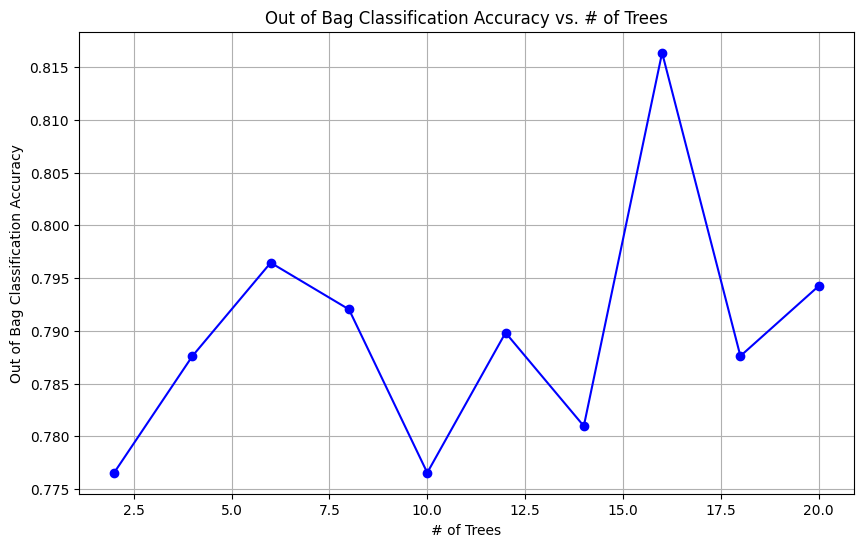

In [ ]:
trees_range = np.arange(2, 22, 2)
oob_acc_list = []

for tree in trees_range:
  RF_classifier = RandomForestClassifier(n_estimators = tree, oob_score = True)
  RF_classifier.fit(X, y)
  oob_accuracy = RF_classifier.oob_score_
  oob_acc_list.append(oob_accuracy)

plt.figure(figsize = (10, 6))
plt.plot(trees_range, oob_acc_list, marker = 'o', linestyle = '-', color = 'b')
plt.title('Out of Bag Classification Accuracy vs. # of Trees')
plt.xlabel('# of Trees')
plt.ylabel('Out of Bag Classification Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)

# Train the Random Forest classifier
RF_classifier = RandomForestClassifier(n_estimators = 18, oob_score = True)
RF_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

     Above 0       0.91      0.92      0.91        75
     Below 0       0.60      0.56      0.58        16

    accuracy                           0.86        91
   macro avg       0.75      0.74      0.75        91
weighted avg       0.85      0.86      0.86        91



In [ ]:
feature_importance = RF_classifier.feature_importances_
oob_score_46 = RF_classifier.oob_score_
df_feature = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by = 'Importance', ascending = False)
print(df_feature)

                Feature  Importance
1   Alcohol consumption    0.614745
2    Exercise frequency    0.232838
0  Caffeine consumption    0.152417
